# Setup and Load

In [2]:
# Setup necessary libraries

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import json

In [3]:
os.getcwd()

'C:\\Users\\Shru\\Documents\\Springboard\\Unit_27\\1481053515_ultimate_challenge\\ultimate_challenge'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'logins.json',
 'Ultimate Challenge - Part2.ipynb',
 'Ultimate Challenge -- Part 1.ipynb',
 'Ultimate Challenge -- Part 3.ipynb',
 'ultimate_data_challenge.json',
 'ultimate_data_science_challenge.pdf']

In [5]:
# load data
path = 'C:\\Users\\Shru\\Documents\\Springboard\\Unit_27\\1481053515_ultimate_challenge\\ultimate_challenge'

# read json file into dictionary
with open(path+os.sep+'ultimate_data_challenge.json') as f:
    data = json.load(f)

In [6]:
# sample data
df = pd.DataFrame(data)

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## EDA

In [8]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


At a quick glance we can see there are missing values and that categorical variables will need to be encoded. In addition we need to make sure all the data types are correct. While we can't know why there is missing data we can fill the avg ratings with means thus leaving the distribution unaltered.

In [9]:
# fill in missing data
# for avg_rating_of/by_driver fill using mean
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)

In [10]:
# set datatypes for datetime columns
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [56]:
# check changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  active                  50000 non-null  int64 

In [11]:
# setup target variable for active in their sixth month on the system
# adding 1 when subtracting because we care about which month the user is in not how many months have passed
df['active'] = df.apply(lambda row: 1 if (row.last_trip_date.month-row.signup_date.month+1) >= 6 else 0, axis=1)
df.active.head()

0    1
1    0
2    0
3    1
4    0
Name: active, dtype: int64

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


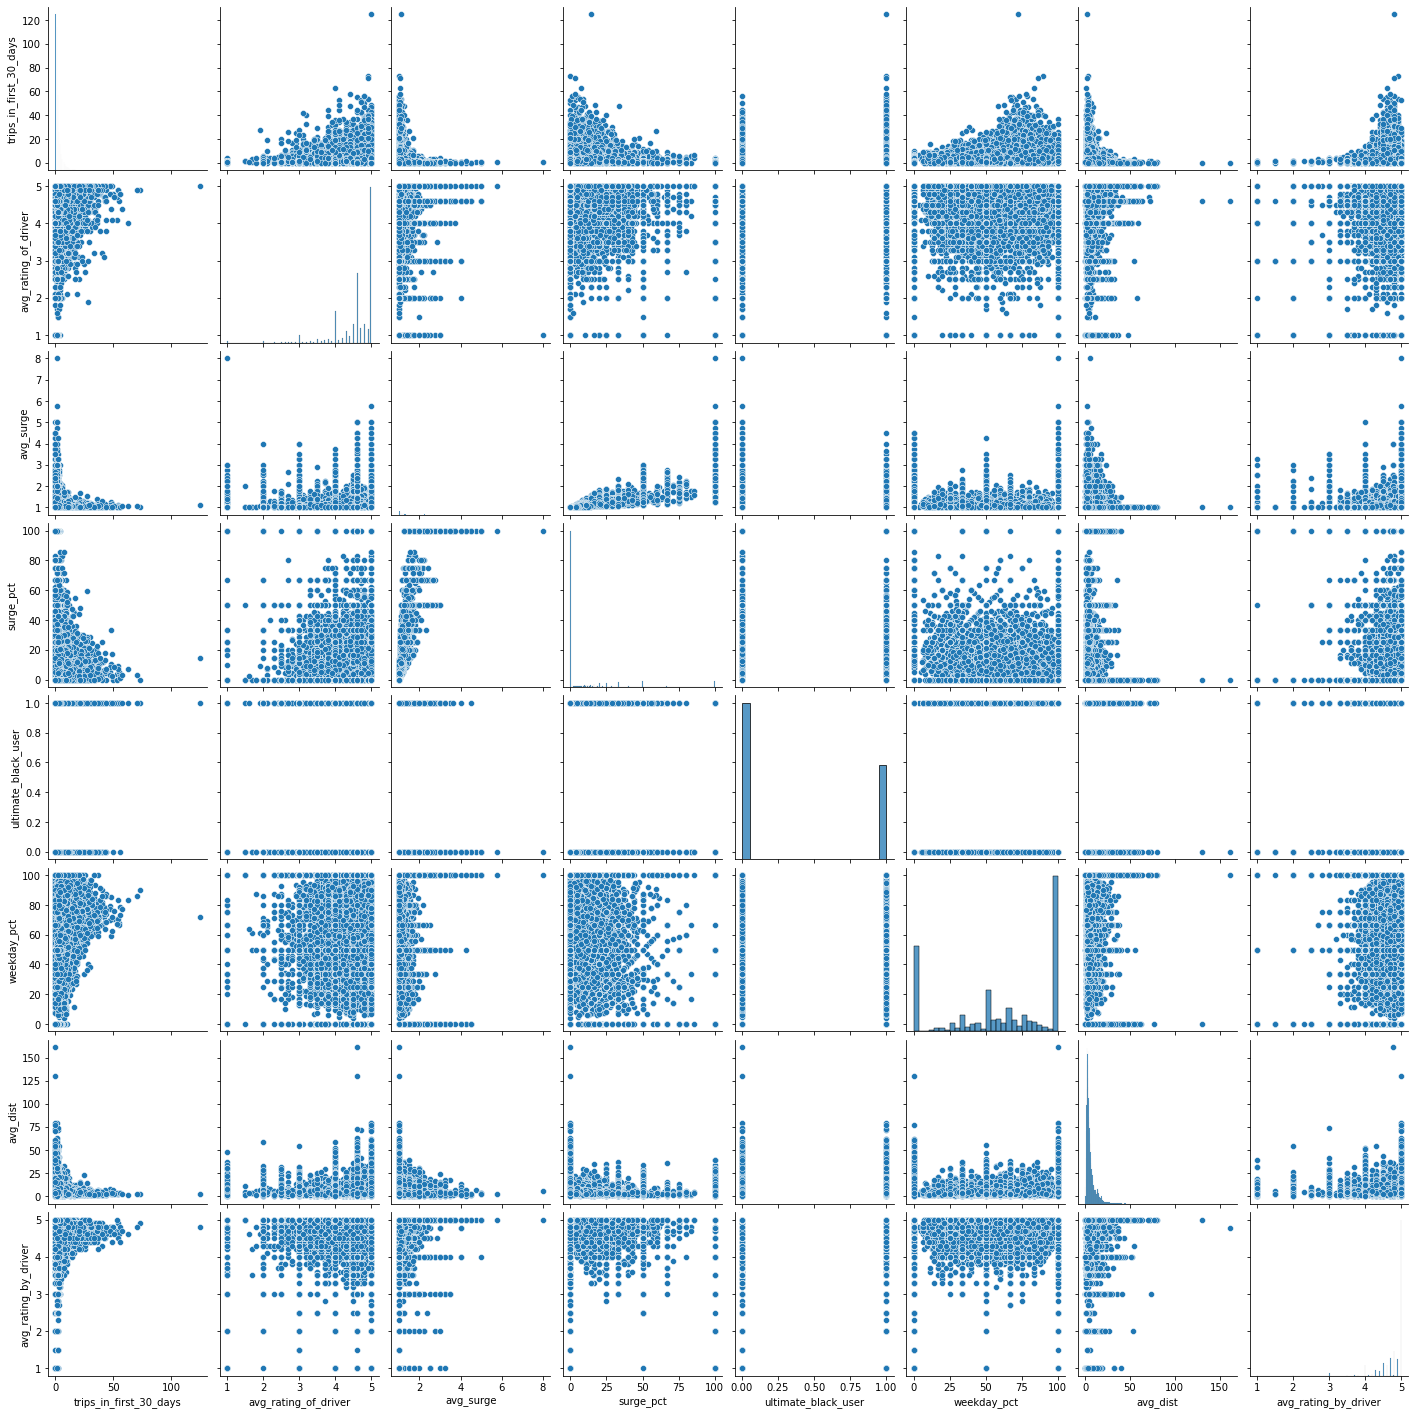

In [23]:
_ = sns.pairplot(df.drop(['active'], axis=1))

The data is not normally distributed and would require normalization before analysis.

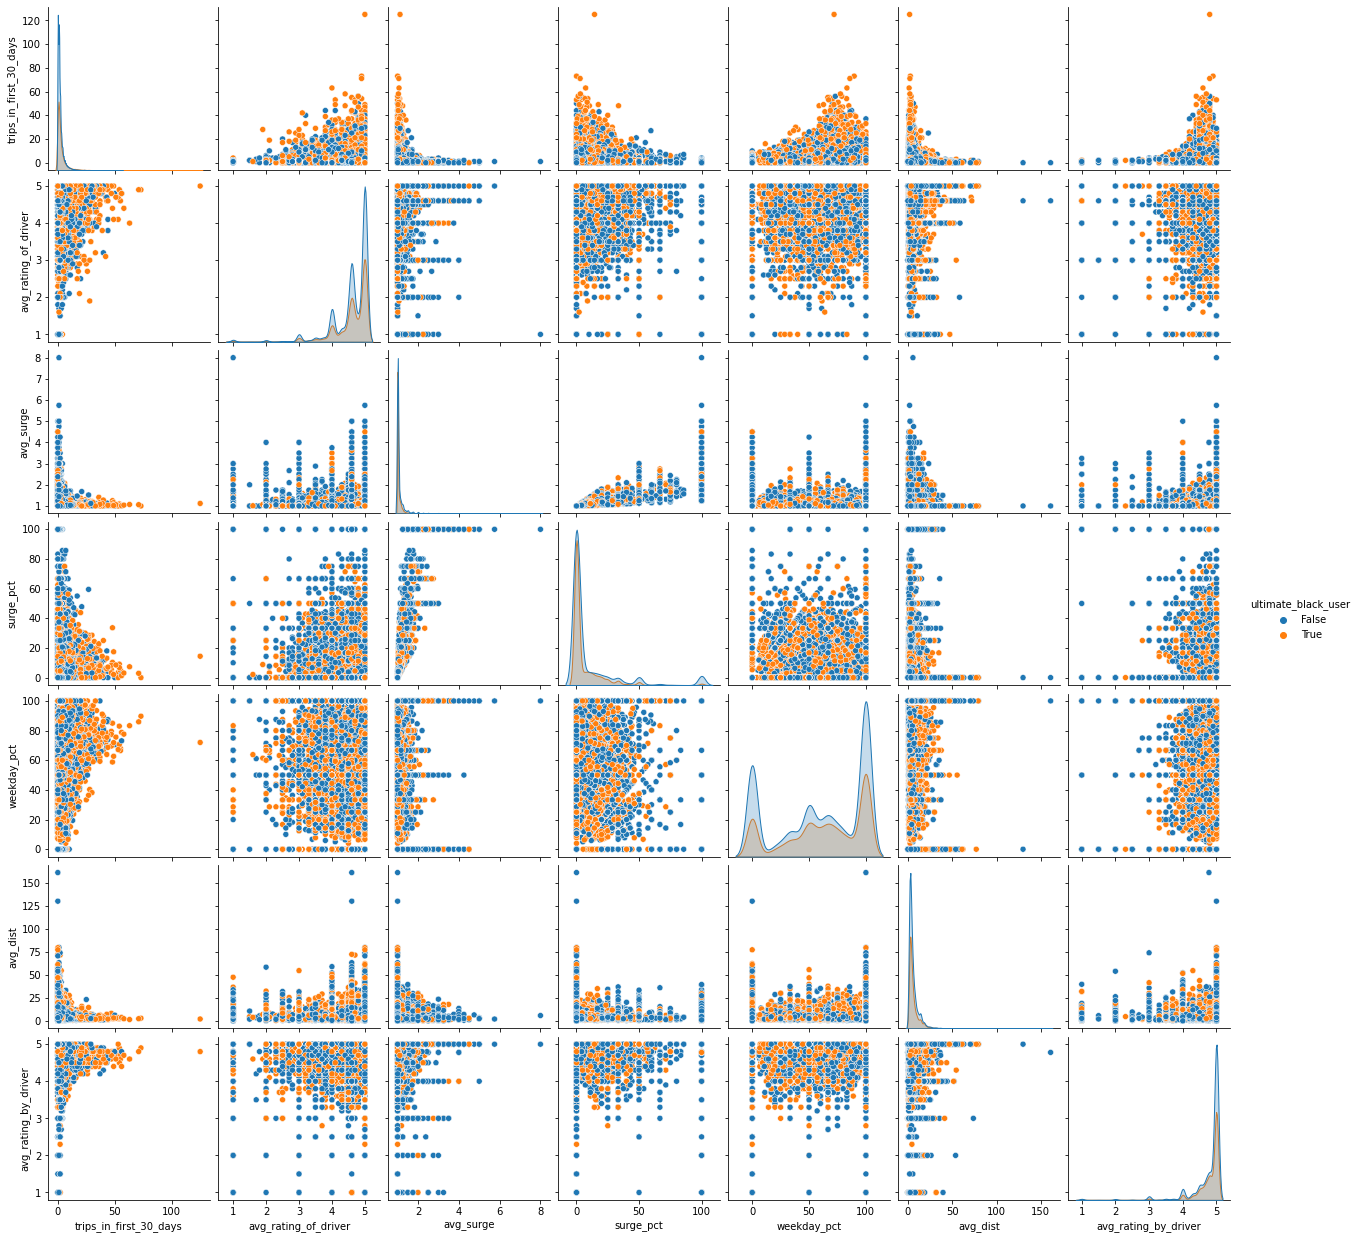

In [50]:
_ = sns.pairplot(df.drop(['active'], axis=1), hue='ultimate_black_user')

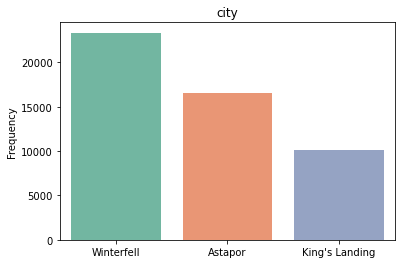

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64


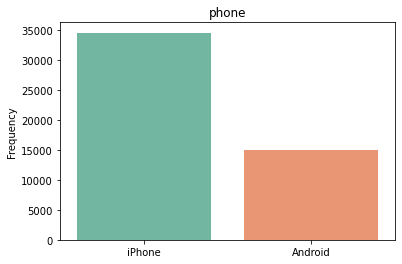

iPhone     34582
Android    15022
Name: phone, dtype: int64


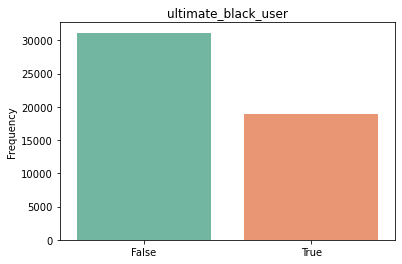

False    31146
True     18854
Name: ultimate_black_user, dtype: int64


In [14]:
categorical_features = ['city','phone','ultimate_black_user']
for feature in categorical_features:
    sns.barplot(x = list(df[feature].value_counts().index), y = df[feature].value_counts(), palette='Set2')
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(df[feature].value_counts())

In [37]:
df1 = df.drop(columns=categorical_features)
df1 = df1.drop('active', axis=1)
df1.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9


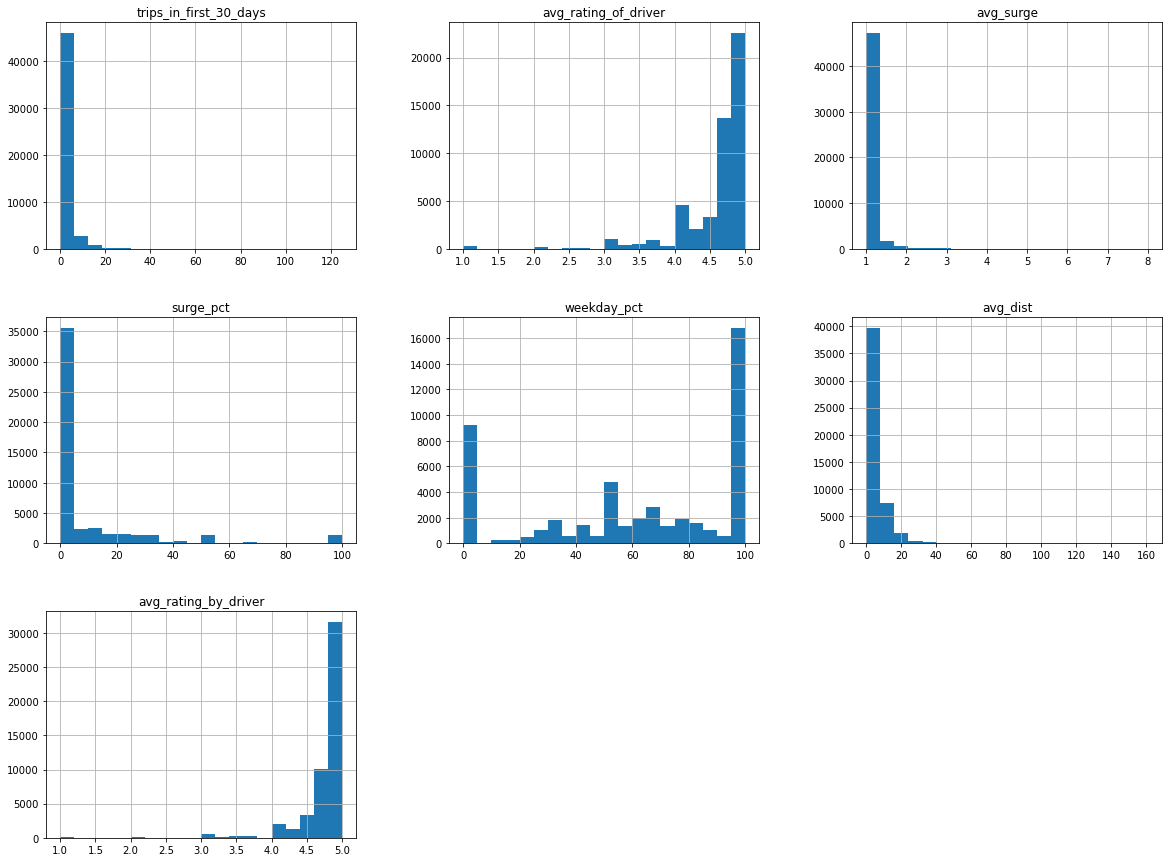

In [46]:
_ = df1.hist(bins=20, figsize=(20,15))

In [52]:
print('Percentage of users retained: {:.1f}%'.format(len(df[df['active']==1])*100/len(df)))

Percentage of users retained: 37.6%


# Preprocessing

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [15]:
# get are dependent and independent variables
X = df.drop('active',axis=1)
y = df.active

# encode all categorical columns
X_cat = df.select_dtypes(include=['object','bool']).copy()
X_enc = pd.get_dummies(X_cat, columns=categorical_features)

# we need to deal with the dates, for now we will drop them, in future modeling we may play with timedelta features
X = X.drop(['signup_date','last_trip_date'], axis=1)
X_ = X.drop(categorical_features,axis=1)
X__ = pd.concat([X_, X_enc], axis=1)
X__.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,1,0,1,0


In [16]:
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X__, y, test_size=0.25, random_state=1)

# scale data to normalize distribution
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# Modeling

### Let's try a couple of classifiers

In [17]:
def get_metrics(y_test, y_predicted):  

    precision = precision_score(y_test, y_predicted, average='weighted')             

    recall = recall_score(y_test, y_predicted, average='weighted')
    
    f1 = f1_score(y_test, y_predicted, average='weighted')
    
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

In [18]:
df_res = pd.DataFrame(columns = ['Model','Precision', 'Recall', 'F1-score', 'Accuracy'])

In [19]:
clf1 = LogisticRegression(solver='saga', class_weight='balanced', random_state=7)
clf2 = RandomForestClassifier(class_weight='balanced', random_state=7)

In [20]:
clf1.fit(X_train_sc, y_train)
y_pred = clf1.predict(X_test_sc)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Model':'Logistic Regression', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)
clf2.fit(X_train_sc, y_train)
y_pred = clf2.predict(X_test_sc)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Model':'Random Forest', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

In [21]:
from sklearn.svm import LinearSVC

In [22]:
clf3 = LinearSVC(class_weight='balanced',random_state=7)

In [23]:
clf3.fit(X_train_sc, y_train)
y_pred = clf3.predict(X_test_sc)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Model':'Linear SVC', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

C:\Users\Shru\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
df_res

,Model,Precision,Recall,F1-score,Accuracy
0,Logistic Regression,0.705129,0.69736,0.699967,0.69736
1,Random Forest,0.751078,0.75328,0.751822,0.75328
2,Linear SVC,0.705024,0.69808,0.700495,0.69808


#### First Impressions

The random forest classifier appears to have done better than logistic regression and SVC. We could test other models, for now lets optimize the random forest model.

In [104]:
n_estimators= [10, 100, 120]
max_depth = [9, 10, 12, 15]
results = pd.DataFrame(columns= ['n_estimators','max_depth','accuracy'])
for est in n_estimators:
    for depth in max_depth:
        clf = RandomForestClassifier(n_estimators = est, max_depth=depth, class_weight='balanced', random_state=7)
        clf.fit(X_train_sc, y_train)
        y_pred = clf.predict(X_test_sc)
        accuracy = accuracy_score(y_test, y_pred)
        results = results.append({'n_estimators': est, 
                      'max_depth': depth,
                      'accuracy': accuracy}, ignore_index=True)

In [105]:
results

,n_estimators,max_depth,accuracy
0,10.0,9.0,0.77128
1,10.0,10.0,0.76760
2,10.0,12.0,0.76792
3,10.0,15.0,0.76128
4,100.0,9.0,0.77208
5,100.0,10.0,0.77328
6,100.0,12.0,0.77296
7,100.0,15.0,0.77192
8,120.0,9.0,0.77208
9,120.0,10.0,0.77208


In [28]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
clf4 = GradientBoostingClassifier(random_state=7)
clf5 = AdaBoostClassifier()

In [26]:
clf4.fit(X_train_sc, y_train)
y_pred = clf4.predict(X_test_sc)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Model':'GBM', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

In [29]:
clf5.fit(X_train_sc, y_train)
y_pred = clf5.predict(X_test_sc)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
df_res = df_res.append({'Model':'AdaBoost', 
                        'Precision': precision, 
                        'Recall': recall, 
                        'F1-score': f1, 
                        'Accuracy': accuracy}, ignore_index=True)

In [30]:
df_res

,Model,Precision,Recall,F1-score,Accuracy
0,Logistic Regression,0.705129,0.69736,0.699967,0.69736
1,Random Forest,0.751078,0.75328,0.751822,0.75328
2,Linear SVC,0.705024,0.69808,0.700495,0.69808
3,GBM,0.779464,0.78208,0.779167,0.78208
4,AdaBoost,0.776721,0.77944,0.776032,0.77944


In [33]:
learning_rate = [0.01, 0.03, 0.1, 1]
n_estimators = [10, 25, 100, 125]
max_depth = [9, 10, 12, 15]
GBM_results = pd.DataFrame(columns= ['n_estimators','max_depth','accuracy'])
for rate in learning_rate:
    for est in n_estimators:
        for depth in max_depth:
            clf = GradientBoostingClassifier(learning_rate = rate, n_estimators = est, max_depth=depth, random_state=7)
            clf.fit(X_train_sc, y_train)
            y_pred = clf.predict(X_test_sc)
            accuracy = accuracy_score(y_test, y_pred)
            GBM_results = GBM_results.append({'n_estimators': est, 
                          'max_depth': depth,
                          'accuracy': accuracy}, ignore_index=True)

In [36]:
GBM_results.sort_values('accuracy', ascending=False).head()

,n_estimators,max_depth,accuracy
28,125.0,9.0,0.78400
24,100.0,9.0,0.78192
36,25.0,9.0,0.78048
29,125.0,10.0,0.78024
37,25.0,10.0,0.77992


In [38]:
GBM_results.iloc[1:28]

,n_estimators,max_depth,accuracy
0,10.0,9.0,0.61800
1,10.0,10.0,0.61800
2,10.0,12.0,0.61800
3,10.0,15.0,0.61800
4,25.0,9.0,0.62408
...,...,...,...
59,100.0,15.0,0.74264
60,125.0,9.0,0.73632
61,125.0,10.0,0.73584
62,125.0,12.0,0.73888


## Final Model

In [41]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

In [39]:
clf = GradientBoostingClassifier(learning_rate = 0.01, n_estimators = 125, max_depth=9, random_state=7)
clf.fit(X_train_sc, y_train)
y_pred = clf.predict(X_test_sc)

In [42]:
print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      7725
           1       0.76      0.61      0.68      4775

    accuracy                           0.78     12500
   macro avg       0.77      0.75      0.76     12500
weighted avg       0.78      0.78      0.77     12500

Test set accuracy: 77.90%


In [43]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=range(0,2), columns=range(0,2))

,0,1
0,6811,914
1,1848,2927


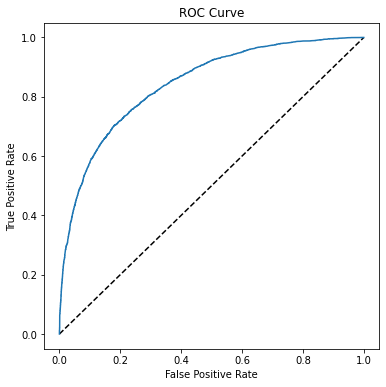

In [46]:
# Compute predicted probabilities
y_pred_prob = clf.predict_proba(X_test_sc)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
_ = plt.figure(figsize=(6,6))
_ = plt.plot([0, 1], [0, 1], 'k--')
_ = plt.plot(fpr, tpr)
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
plt.show()

In [47]:
# Compute and print AUC score
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8433


In [49]:
fi = pd.DataFrame(list(zip(X.columns, clf.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
6,ultimate_black_user,0.339078
8,avg_dist,0.157687
4,phone,0.094429
3,avg_surge,0.078029
5,surge_pct,0.074695


# Suggestions to Ultimate

To improve rider-retention Ultimate should consider the following:
    1. Run promotions for longer/shorter trips depending on how distance affects ridership
    2. Run promotions for Ulitmate Black trips
    3. Consider testing how surge prices affect ridership and adjust accordingly